# **Outliers**

In [6]:
%load_ext autoreload
%autoreload 2

# -----------------------------------------------------------------------
import pandas as pd

import sys
sys.path.append("../../../")
from src import funciones_outliers as fo


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
df = pd.read_pickle("../../../datos/cluster_0/df_nonulls_encoded.pkl")
df.head()

,Profit,Country,Market,Sub-Category,Quantity,Discount,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,1906.485,20.327050,20.327050,13.818765,5,0.2,867.69,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,83.281,20.327050,20.327050,10.348320,5,0.0,846.54,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1036.080,37.298648,17.081114,92.253159,12,0.0,804.54,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,186.948,28.958036,24.238419,92.253159,4,0.1,801.66,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,3979.080,24.128550,24.238419,92.253159,14,0.0,778.32,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [40]:
df.describe().T[:1]

,count,mean,std,min,25%,50%,75%,max
Profit,24654.0,18.948928,116.052973,-3701.8928,0.78,7.2576,22.05,4946.37


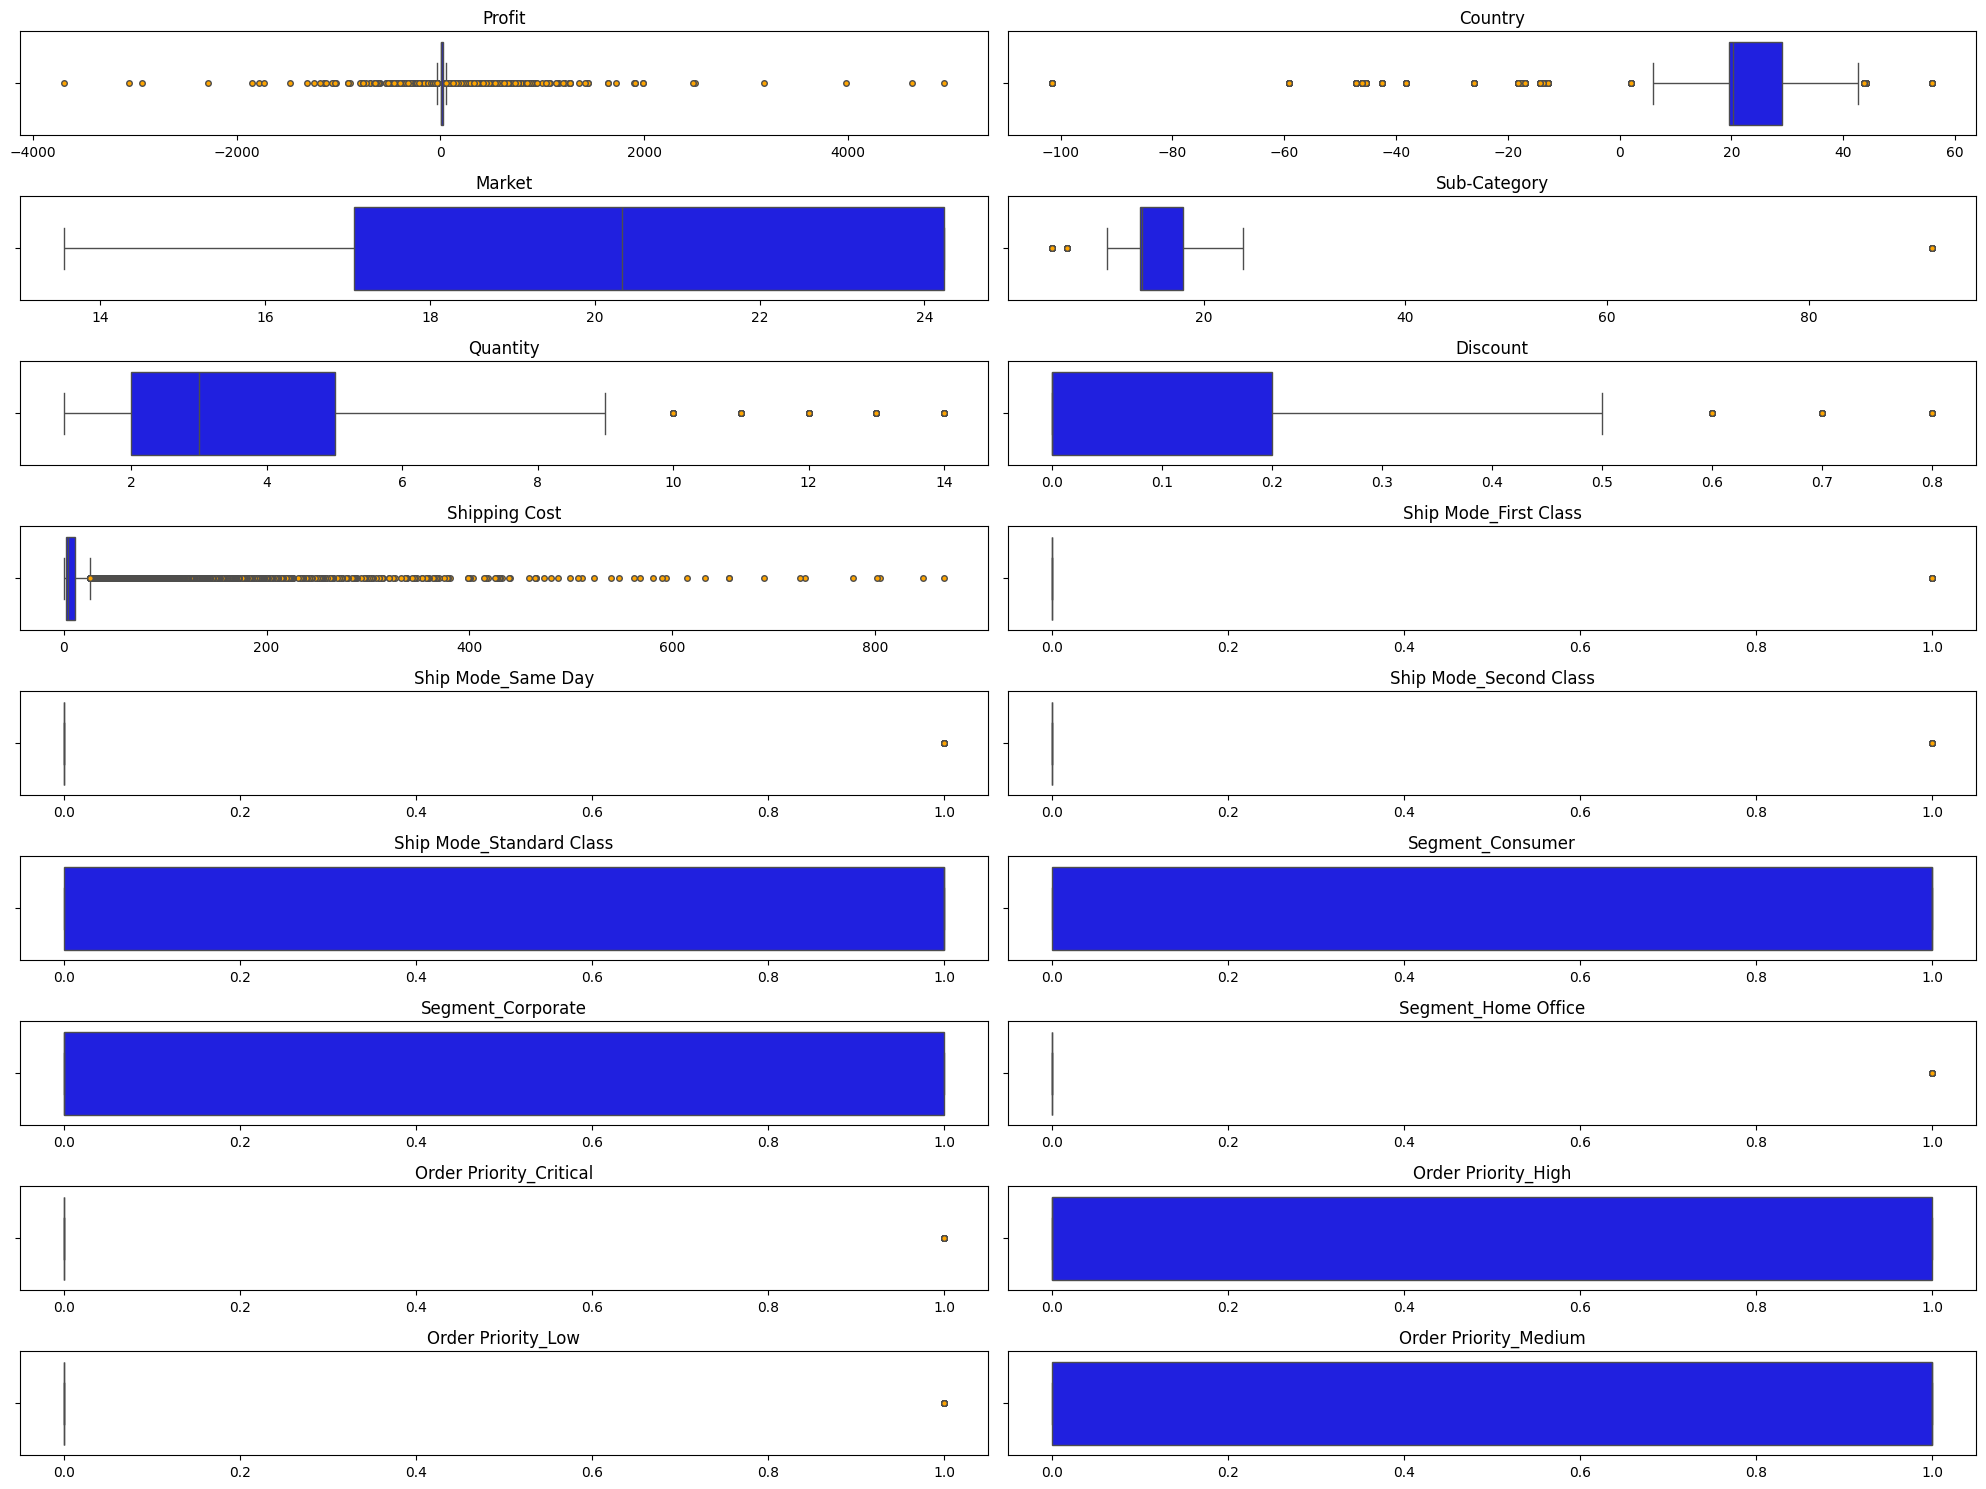

In [11]:
univariados = fo.GestionOutliersUnivariados(df)
univariados.visualizar_outliers_univariados()

Como vimos en el EDA es complicado entender los outliers univariados, por lo que vamos a observar los multivariados, usaremos el algoritmo IFO pues los outliers que observamos en su mayoría no están aisaldos si no que aparecen más agrupados.

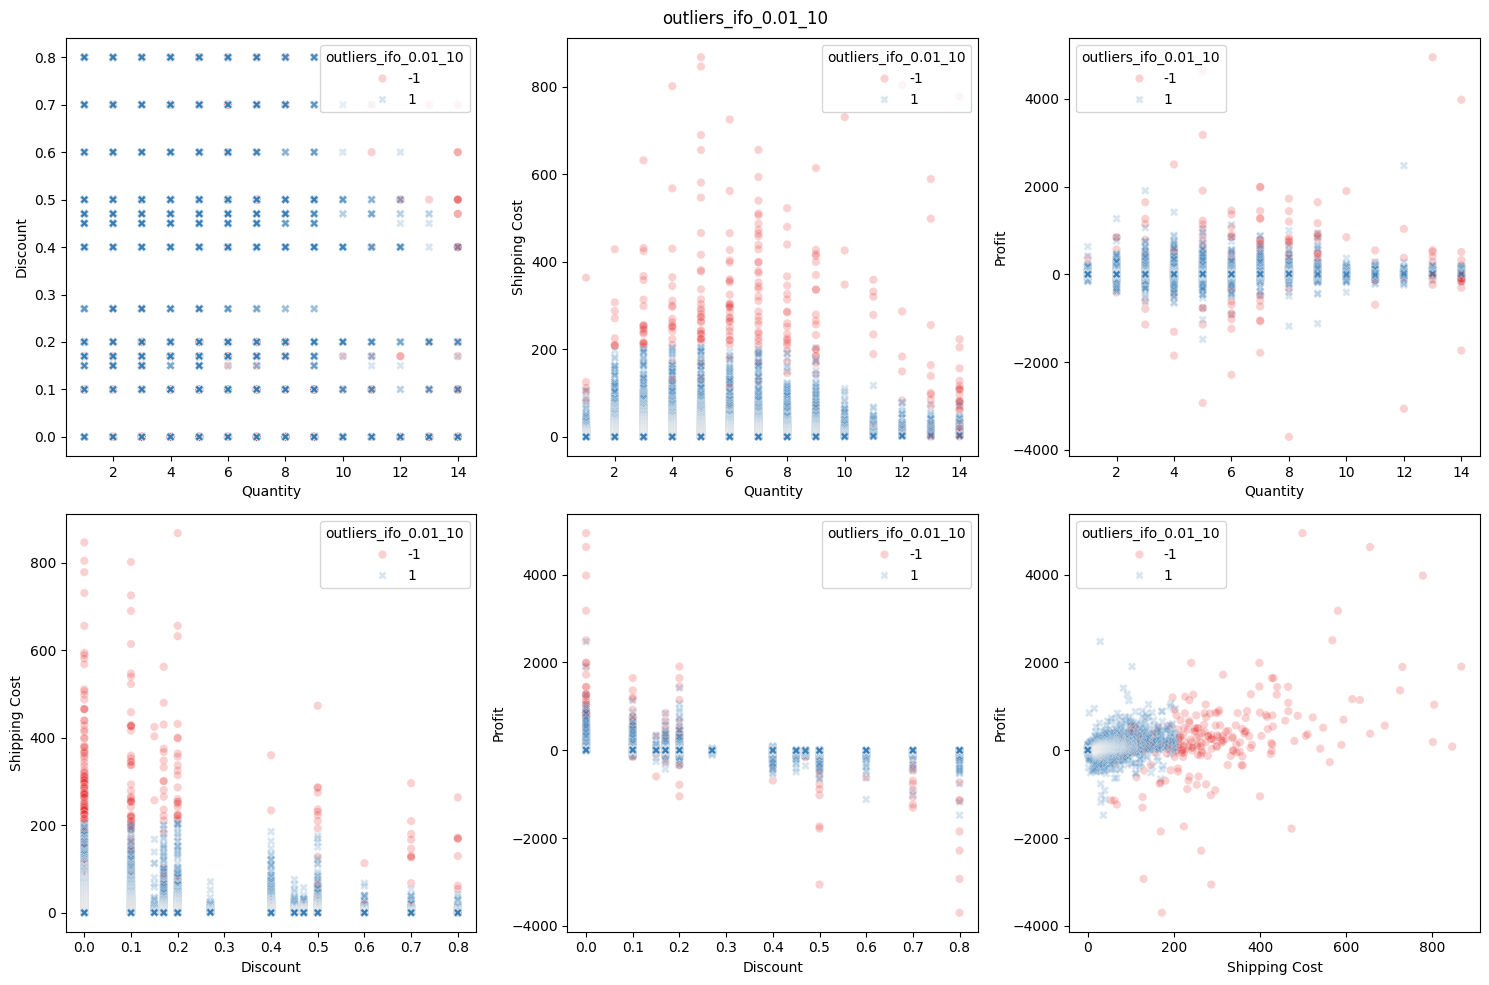

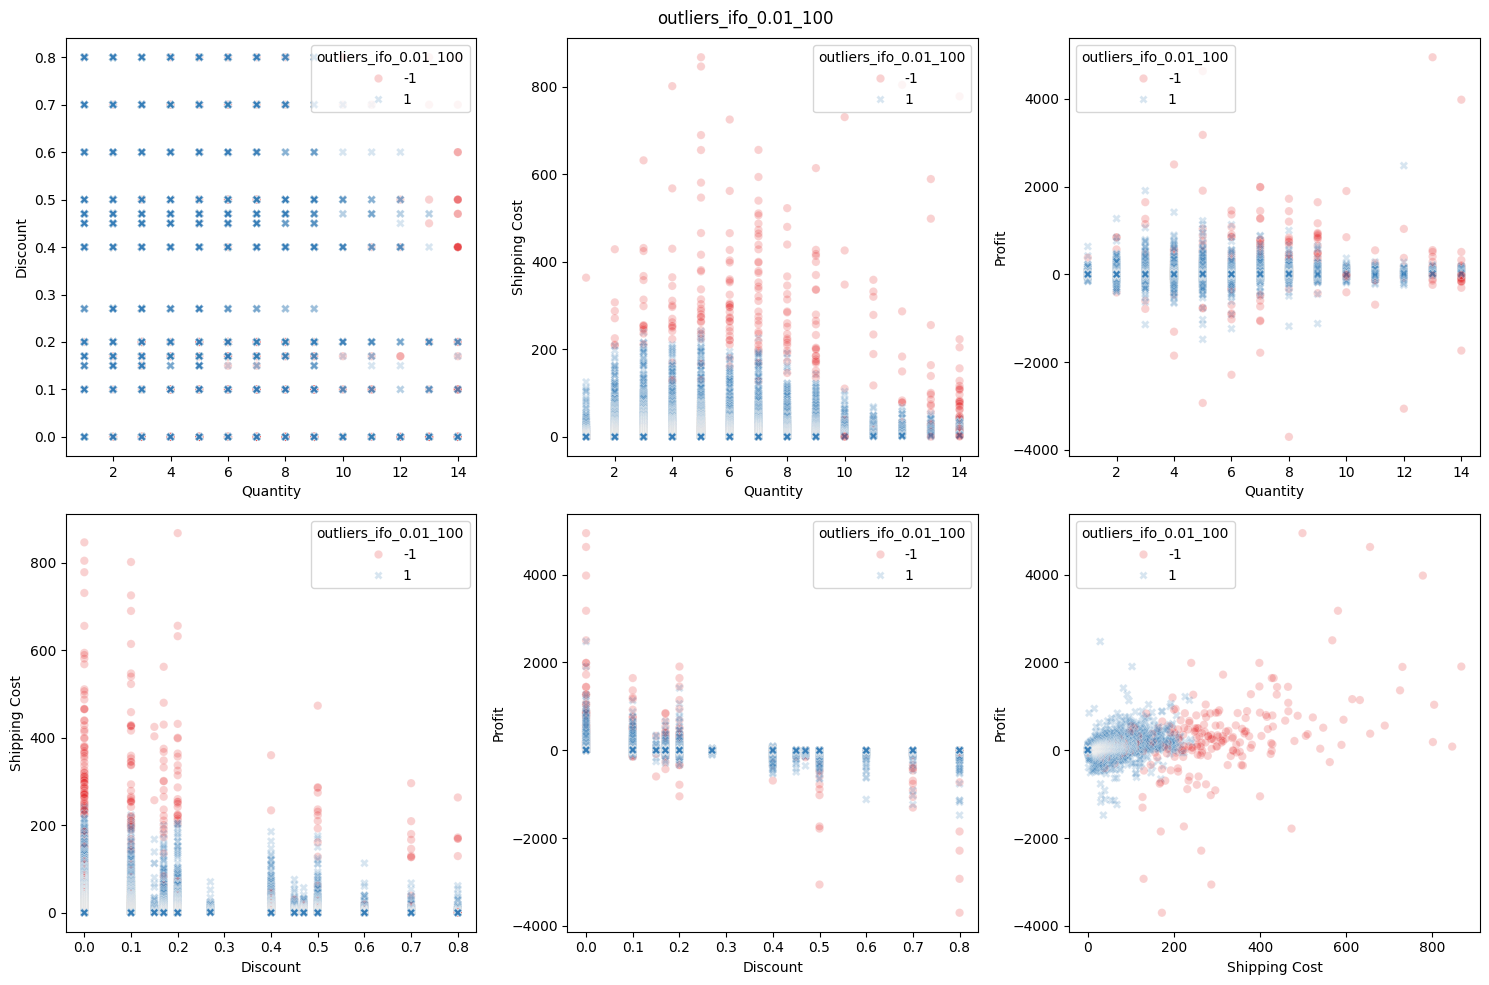

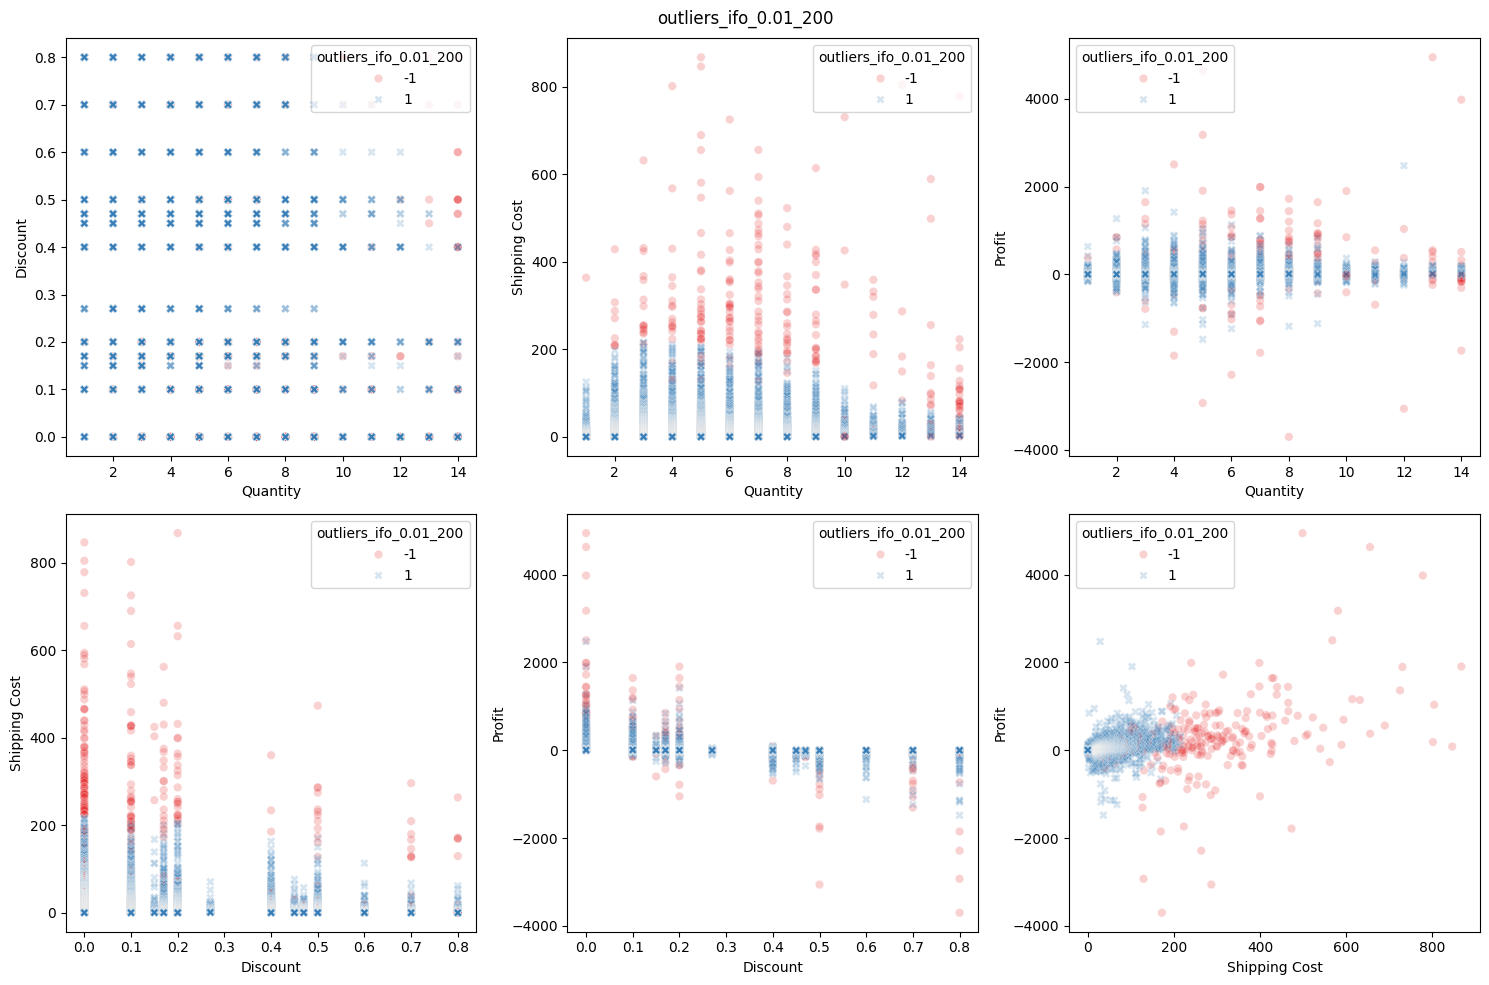

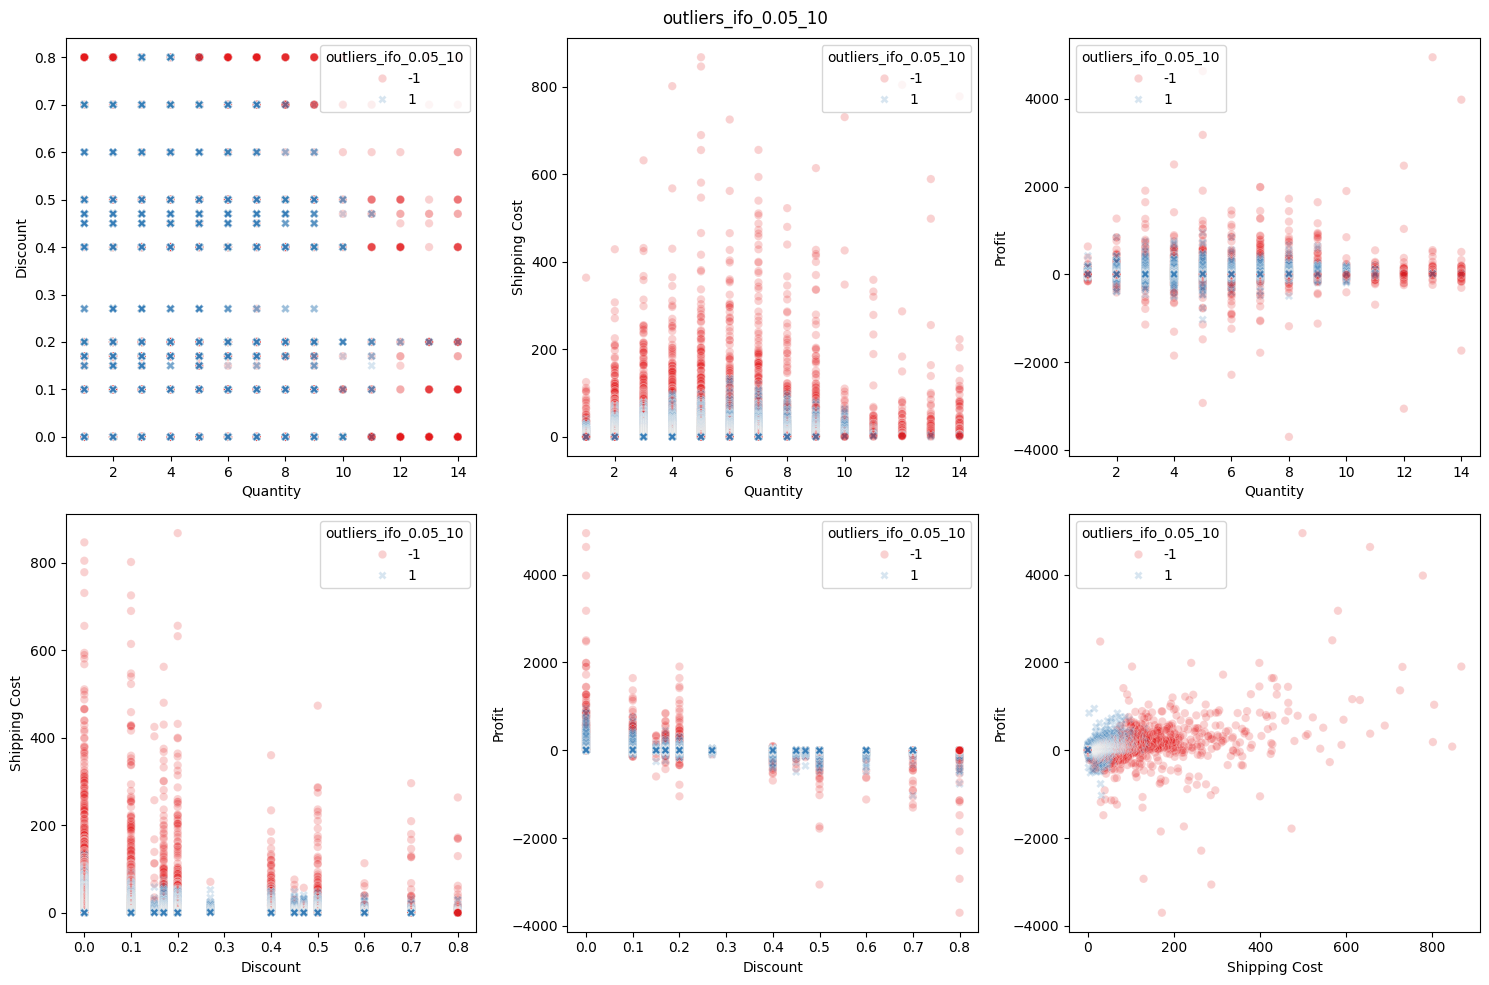

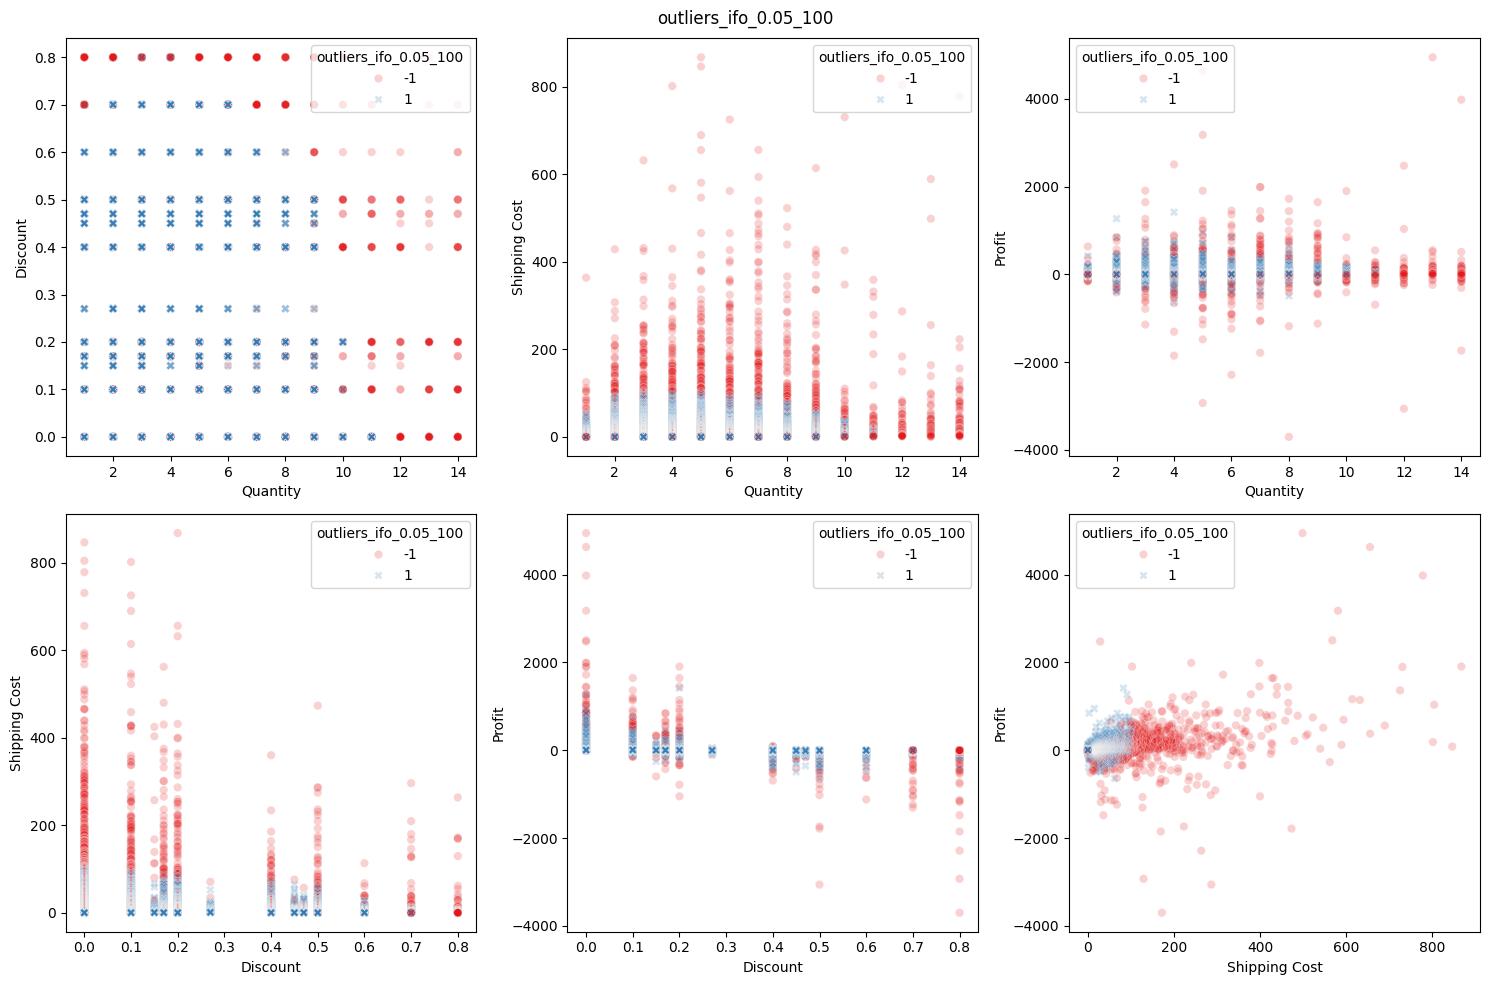

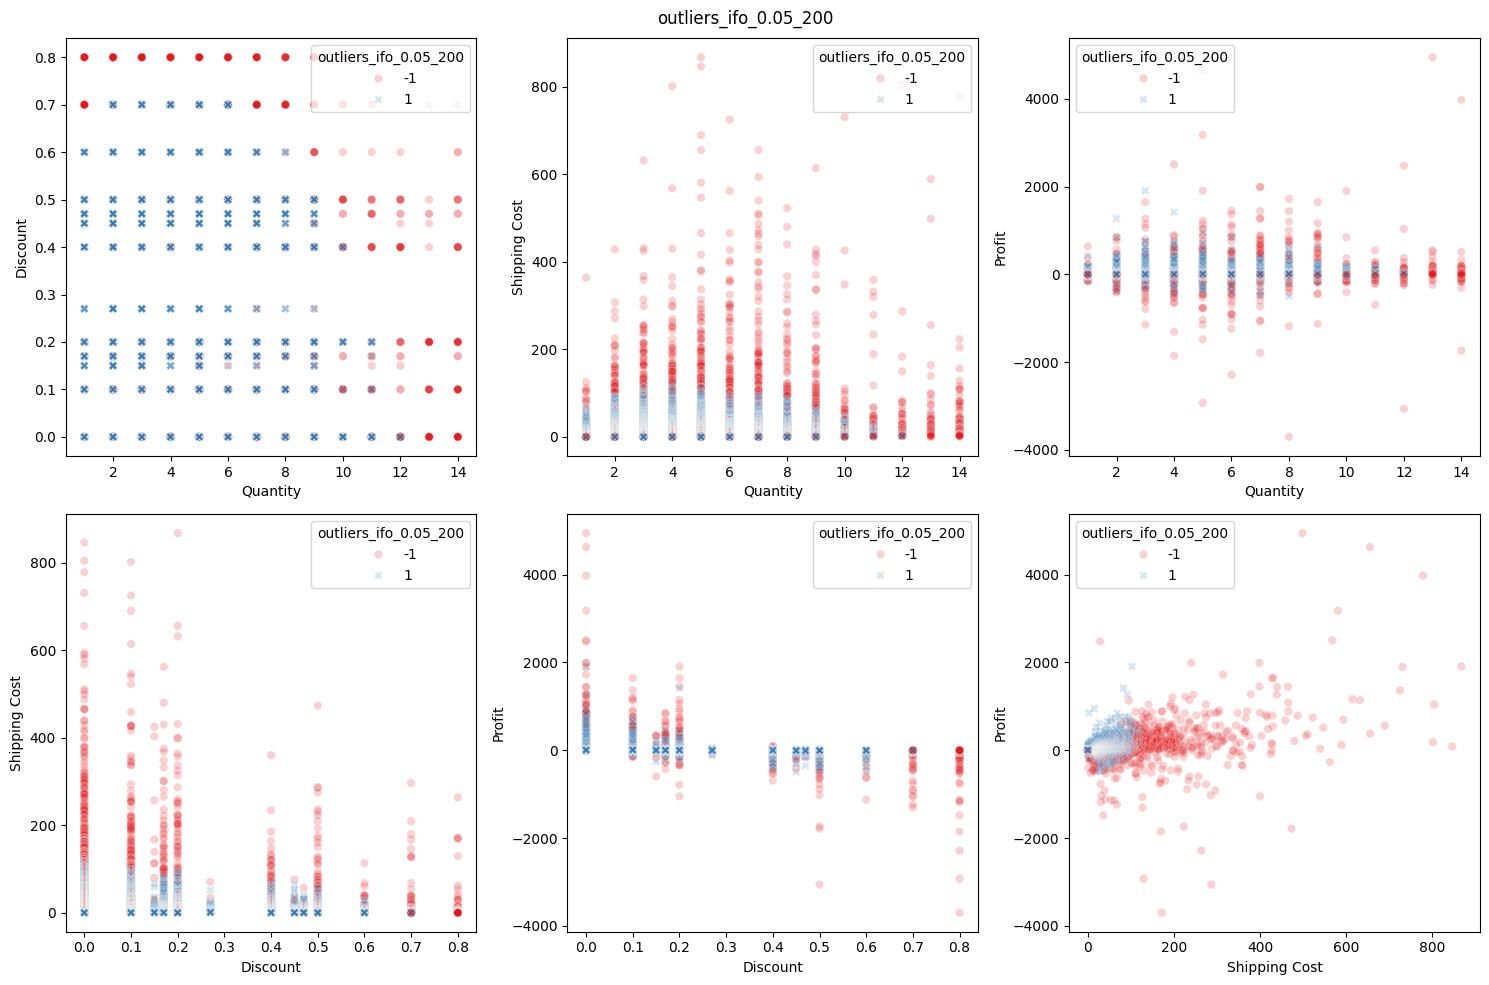

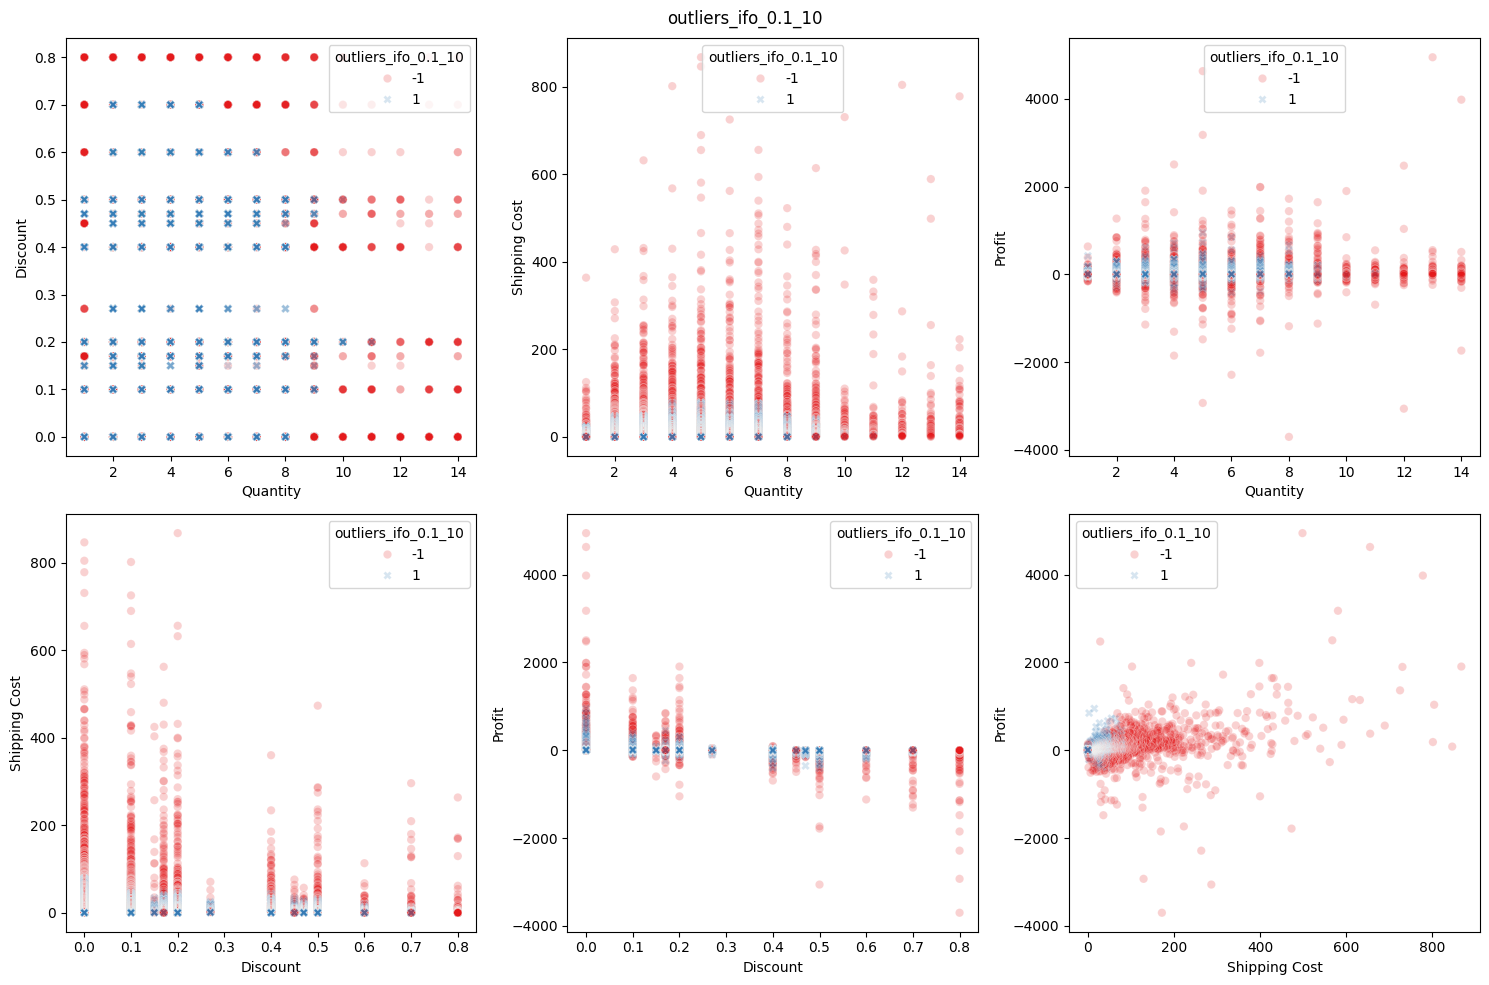

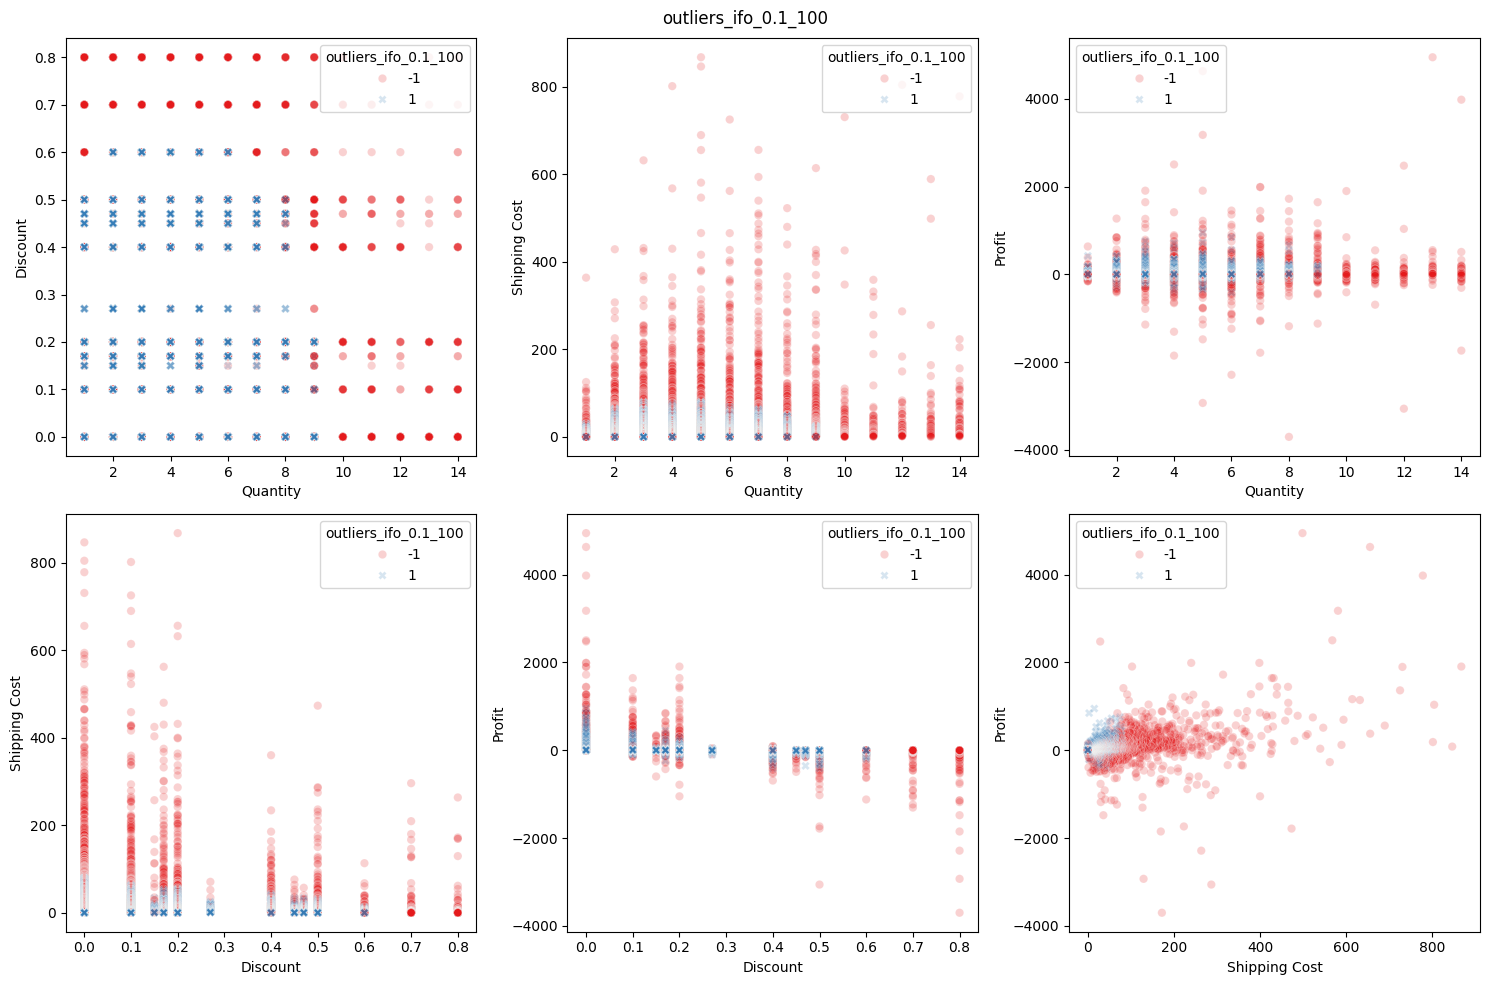

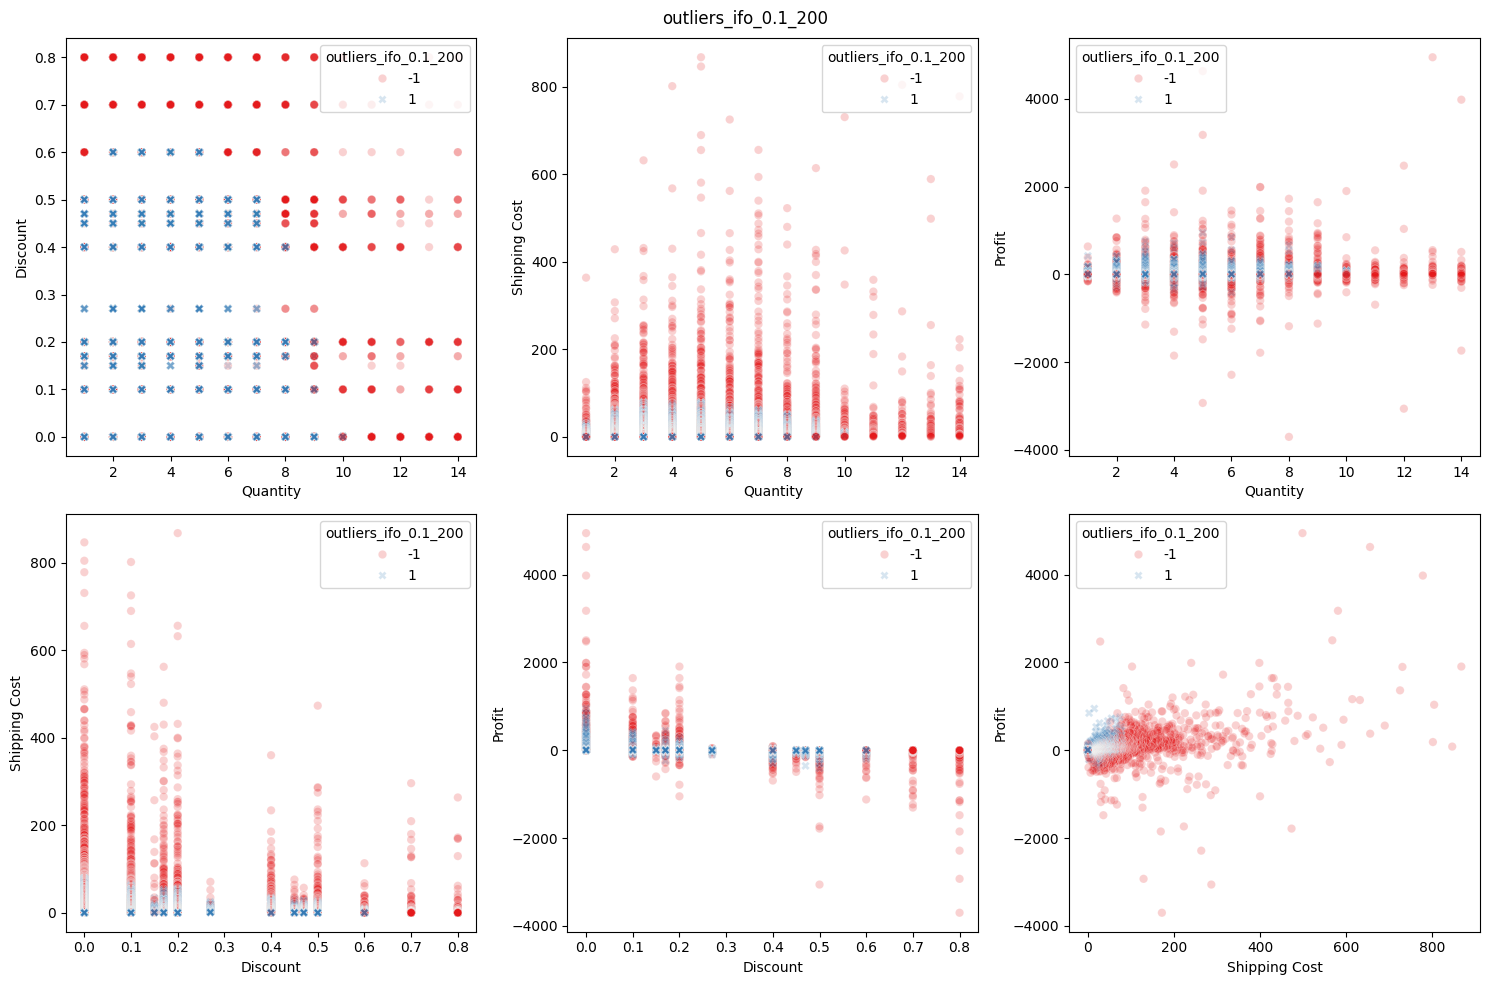

In [14]:
multi = fo.GestionOutliersMultivariados(df)

contaminacion = [0.01, 0.05, 0.1]
estimadores = [10, 100, 200]
cols = ['Quantity', 'Discount', 'Shipping Cost']
vr = "Profit"
df_outliers = multi.detectar_outliers_if(cols, vr, contaminacion, estimadores)

Como observando las gráficas vemos un gran cantidad de outliers vamos a probar a fltrarlos por aquellos registros en los que en el 60% de las veces han dado positivo como outlier.

In [ ]:
df_outliers["porcentaje_outliers"] = df_outliers.filter(like="outliers").apply(lambda x: round(sum(x==-1)/len(x),2), axis=1)
df_outliers.sample(5)

,Profit,Country,Market,Sub-Category,Quantity,Discount,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,...,outliers_ifo_0.01_10,outliers_ifo_0.01_100,outliers_ifo_0.01_200,outliers_ifo_0.05_10,outliers_ifo_0.05_100,outliers_ifo_0.05_200,outliers_ifo_0.1_10,outliers_ifo_0.1_100,outliers_ifo_0.1_200,porcentaje_outliers
1009,-210.624,-13.651724,13.554942,23.876477,4,0.4,61.01,0.0,0.0,1.0,...,1,1,1,-1,1,1,-1,-1,-1,0.44
3701,90.480,25.924960,13.554942,23.876477,2,0.0,19.48,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,0.00
1483,475.800,24.378324,13.554942,92.253159,5,0.0,44.36,0.0,0.0,1.0,...,1,1,1,1,1,1,1,1,1,0.00
6442,26.560,8.558976,13.554942,23.876477,4,0.0,11.08,1.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,0.00
4367,-33.804,20.327050,20.327050,23.876477,3,0.2,16.67,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,0.00


In [33]:
porcentaje = 0.6
df_outliers_porcentaje = df_outliers[df_outliers["porcentaje_outliers"]>porcentaje]
df_restante = df_outliers[df_outliers["porcentaje_outliers"]<porcentaje]

print(f"Tenemos un {round(df_outliers_porcentaje.shape[0]/df_outliers.shape[0]*100, 2)}% de outliers respecto al total de los datos.")

Tenemos un 3.84% de outliers respecto al total de los datos.


Como primera aproximación vmos a probar a quitar estos outliers y quedarnos con el resto del dataframe, en próximas iteraciones podemos probar a mantenerlos o imputarlos.

In [35]:
df_final = df_restante.loc[:, ~df_restante.columns.str.contains("outlier")]
print(df_final.shape)
df_final.head(2)

(23707, 18)


,Profit,Country,Market,Sub-Category,Quantity,Discount,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
344,190.92,8.558976,13.554942,23.876477,6,0.0,133.06,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
345,45.90,36.318853,17.081114,23.876477,6,0.0,132.73,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [41]:
df_final.describe().T[:1]

,count,mean,std,min,25%,50%,75%,max
Profit,23707.0,15.258663,54.0584,-1031.5385,0.912,7.152,20.7255,1906.485


Como podemos observar dentro de ese 3.84% se encontraban los valores más extremos dejando ahora el rango del profit entre -1000 y 2000.

In [36]:
df_final.to_pickle("../../../datos/cluster_0/df_nonulls_encoded_sinout.pkl")